In [21]:
# ------------------------------------------------------------
# CELDA 1 — IMPORTAR LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ------------------------------------------------------------
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import random
import warnings
warnings.filterwarnings("ignore")

# Configuración visual
plt.style.use("seaborn-v0_8")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 20

print("✅ Librerías cargadas correctamente.")


✅ Librerías cargadas correctamente.


In [23]:
# ------------------------------------------------------------
# CELDA 2 — CARGAR LAS CALLES DEL PARTIDO DE LA PLATA
# ------------------------------------------------------------
streets = gpd.read_file("data/partido.geojson")

# Asegurarse de que esté en CRS geográfico (lat/lon)
streets = streets.to_crs(epsg=4326)

print("✅ Calles cargadas:", len(streets))
display(streets.head())


✅ Calles cargadas: 14271


,id,@id,4wd_only,abandoned,access,admin_level,alt_name,area,bicycle,bicycle:lanes,boundary,bridge,bridge:name,bus_bay,check_date,check_date:surface,construction,covered,crossing,crossing:island,crossing:markings,cutting,cycleway,cycleway:both,cycleway:left,...,short_name,shoulder,sidewalk,sidewalk:both:surface,sidewalk:left,sidewalk:left:surface,sidewalk:right,sidewalk:right:surface,smoothness,source,sport,step_count,supervised,surface,surface:note,tactile_paving,taxi,tourist_bus,tracktype,tunnel,turn:lanes,vehicle:lanes,wheelchair,width,geometry
0,way/254328264,way/254328264,None,None,None,None,None,None,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.9363 -34.94583, -57.93665 -34.94..."
1,way/271123779,way/271123779,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,fine_gravel,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.94045 -34.93234, -57.94069 -34.9..."
2,way/283164220,way/283164220,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.97452 -34.91696, -57.97443 -34.9..."
3,way/302946377,way/302946377,None,None,None,None,None,None,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.93761 -34.9471, -57.93749 -34.94..."
4,way/346874947,way/346874947,None,None,None,None,None,yes,None,None,None,None,None,None,NaT,NaT,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,concrete,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-57.93573 -34.91024, -57.93571 -34.9..."


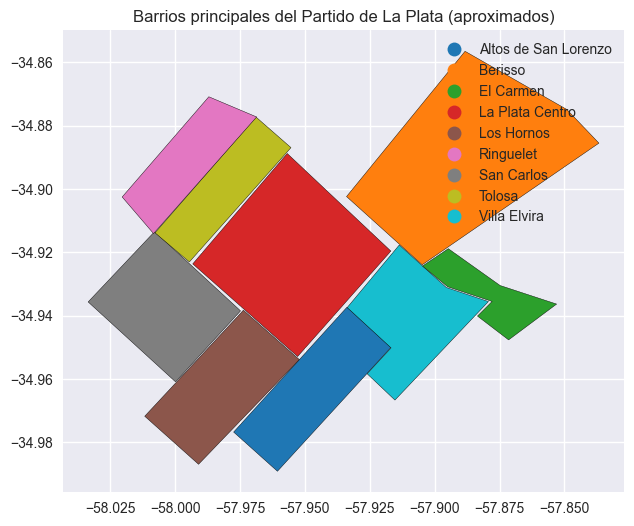

In [24]:
# ------------------------------------------------------------
# CELDA 3 — CREAR POLÍGONOS DE BARRIOS (APROXIMADOS)
# ------------------------------------------------------------
barrios_data = {
    "barrio": [
        "La Plata Centro",
        "Altos de San Lorenzo",
        "Villa Elvira",
        "Los Hornos",
        "San Carlos",
        "Tolosa",
        "Ringuelet",
        "Berisso",
        "El Carmen"
    ],
    "geometry": [
        Polygon([(
              -57.993200538870354,
              -34.9236561594184
            ),
            (
              -57.95279827098693,
              -34.95292252599034
                ),
            (
              -57.91685421138479,
              -34.919610571054825
                ),
            (
              -57.95678990653711,
              -34.88877823632433
                ),
            (
              -57.993200538870354,
              -34.9236561594184
                )]),
        Polygon([(
              -57.97744465608608,
              -34.97678930470841
        ),
            (
              -57.96057260131829,
              -34.989177259483256
            ),
            (
              -57.916840832094735,
              -34.95004596353793
            ),
            (
              -57.933774414062526,
              -34.93733934894317
            ),
            (
              -57.97744465608608,
              -34.97678930470841
            )]),
        Polygon([(
              -57.933683391848845,
              -34.93744138673115
        ),
            (
              -57.916779601719824,
              -34.95019862728453
            ),
            (
              -57.926001726313956,
              -34.95836729090993
            ),
            (
              -57.91529355831318,
              -34.9666870037231
            ),
            (
              -57.879273101916596,
              -34.93556237632729
            ),
            (
              -57.89548707958103,
              -34.931118151583696
            ),
            (
              -57.9136316261059,
              -34.91769459742163
            ),
            (
              -57.933683391848845,
              -34.93744138673115
            )]),
        Polygon([(
              -57.9736814642166,
              -34.938291025499694
        ),
            (
              -58.011708500152835,
              -34.97178322306402
            ),
            (
              -57.99096357712506,
              -34.98697340597603
            ),
            (
              -57.95214644859979,
              -34.95387916261777
            ),
            (
              -57.9736814642166,
              -34.938291025499694
            )]),
        Polygon([(
              -58.00789307857907,
              -34.91345345717265
        ),
            (
              -58.03351315166199,
              -34.935671746805454
            ),
            (
              -57.99982802178211,
              -34.96092257436045
            ),
            (
              -57.97478068697153,
              -34.93850472221015
            ),
            (
              -58.00789307857907,
              -34.91345345717265
                )]),
        Polygon([(
              -58.0077395722808,
              -34.91383873001039
        ),
            (
              -57.99450008984543,
              -34.92304382633563
            ),
            (
              -57.95534708775182,
              -34.886923437810964
            ),
            (
              -57.96887091395726,
              -34.877233456289375
            ),
            (
              -58.0077395722808,
              -34.91383873001039
                )]),
        Polygon([(
              -58.02039822401014,
              -34.9025156164086
        ),
            (
              -58.00831520164233,
              -34.91407492749808
            ),
            (
              -57.96858296264091,
              -34.877233419823014
            ),
            (
              -57.98700904832104,
              -34.87085261718699
            ),
            (
              -58.02039822401014,
              -34.9025156164086
            )]),
        Polygon([(
              -57.93394330115632,
              -34.9023835158271
        ),
            (
              -57.90478815330994,
              -34.92393546315047
            ),
            (
              -57.836686256100904,
              -34.885502047022236
            ),
            (
              -57.84907198746991,
              -34.87486435164793
            ),
            (
              -57.88827282939937,
              -34.856483470911904
                ),
            (
              -57.93394330115632,
              -34.9023835158271
                )]),
        Polygon([[
              -57.90465166092022,
              -34.92432439696681
            ],
            [
              -57.89496589519241,
              -34.93088486403581
            ],
            [
              -57.87784392386506,
              -34.93551528999437
            ],
            [
              -57.883492602903615,
              -34.94014638052165
            ],
            [
              -57.871491788414744,
              -34.94766903506655
            ],
            [
              -57.8529923651779,
              -34.936350906533924
            ],
            [
              -57.87476991630436,
              -34.93048714227996
            ],
            [
              -57.89472037256887,
              -34.918857294898686
            ],
            [
              -57.90465166092022,
              -34.92432439696681
            ]])
    ]
}

barrios = gpd.GeoDataFrame(barrios_data, crs="EPSG:4326")

# Visualización de los barrios
barrios.plot(column="barrio", cmap="tab10", legend=True, figsize=(8, 6), edgecolor="black")
plt.title("Barrios principales del Partido de La Plata (aproximados)")
plt.show()


In [25]:
# ------------------------------------------------------------
# CELDA 4 — FILTRAR CALLES DEL PARTIDO Y ASIGNAR BARRIO
# ------------------------------------------------------------
# Asegurar CRS iguales
if streets.crs != barrios.crs:
    barrios = barrios.to_crs(streets.crs)

# Solo mantener calles dentro del polígono de La Plata
streets_lp = streets.copy()

# Asignar barrio (join espacial)
streets_with_barrio = gpd.sjoin(streets_lp, barrios[["barrio", "geometry"]], how="left", predicate="intersects")

print("✅ Calles con barrio asignado:", len(streets_with_barrio))
display(streets_with_barrio[["name", "barrio"]].head(10))


✅ Calles con barrio asignado: 14434


,name,barrio
0,None,Altos de San Lorenzo
1,None,La Plata Centro
2,None,La Plata Centro
3,None,Altos de San Lorenzo
4,None,La Plata Centro
5,None,La Plata Centro
6,None,La Plata Centro
7,None,NaN
8,None,NaN
9,None,NaN


In [26]:
# ------------------------------------------------------------
# CELDA 5 — DETECTAR CALLES EN >1 BARRIO (AMBIGÜEDADES)
# ------------------------------------------------------------
streets_with_barrio["name_norm"] = (
    streets_with_barrio["name"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({"none": np.nan})
)

# Contar cuántos barrios tiene cada nombre
street_barrio_groups = (
    streets_with_barrio.dropna(subset=["name_norm"])
    .groupby("name_norm")["barrio"]
    .nunique()
    .reset_index(name="n_barrios")
)

ambiguous_streets = street_barrio_groups[street_barrio_groups["n_barrios"] > 1].copy()
print("⚠️ Calles detectadas en >1 barrio:", len(ambiguous_streets))
display(ambiguous_streets.sort_values("n_barrios", ascending=False).head(20))


⚠️ Calles detectadas en >1 barrio: 199


,name_norm,n_barrios
150,calle 15,5
172,calle 16,5
191,calle 17,5
206,calle 18,5
124,calle 14,5
242,calle 20,5
18,avenida 31,5
259,calle 21,5
279,calle 22,5
344,calle 29,4


In [27]:
# ------------------------------------------------------------
# CELDA 6 — GENERAR DATOS SINTÉTICOS DE RUTAS Y ENTREGAS
# ------------------------------------------------------------
random.seed(42)

rutas = [
    "La Plata Centro Norte",
    "La Plata Centro Sur",
    "Altos de San Lorenzo",
    "Villa Elvira",
    "Los Hornos",
    "San Carlos",
    "Tolosa",
    "Ringuelet",
    "Berisso",
    "El Carmen"
]

data = []
for ruta in rutas:
    base_entregas = random.randint(250, 400)
    mal_ubicados = random.randint(1, 10)
    ambiguos = random.randint(1, 15)
    efectividad = round(100 - ((mal_ubicados + ambiguos) / base_entregas * 100), 2)

    # Penalizar barrios más conflictivos
    if ruta in ["Berisso", "El Carmen"]:
        mal_ubicados += random.randint(5, 10)
        ambiguos += random.randint(10, 20)
        efectividad = round(100 - ((mal_ubicados + ambiguos) / base_entregas * 100), 2)

    data.append({
        "ruta": ruta,
        "entregas_totales": base_entregas,
        "mal_ubicados": mal_ubicados,
        "ambiguos": ambiguos,
        "efectividad_%": efectividad
    })

rutas_df = pd.DataFrame(data)
display(rutas_df)


,ruta,entregas_totales,mal_ubicados,ambiguos,efectividad_%
0,La Plata Centro Norte,278,1,12,95.32
1,La Plata Centro Sur,320,4,4,97.50
2,Altos de San Lorenzo,285,2,11,95.44
3,Villa Elvira,389,2,10,96.92
4,Los Hornos,358,1,1,99.44
5,San Carlos,273,4,4,97.07
6,Tolosa,379,10,1,97.10
7,Ringuelet,393,4,12,95.93
8,Berisso,389,15,23,90.23
9,El Carmen,321,7,29,88.79


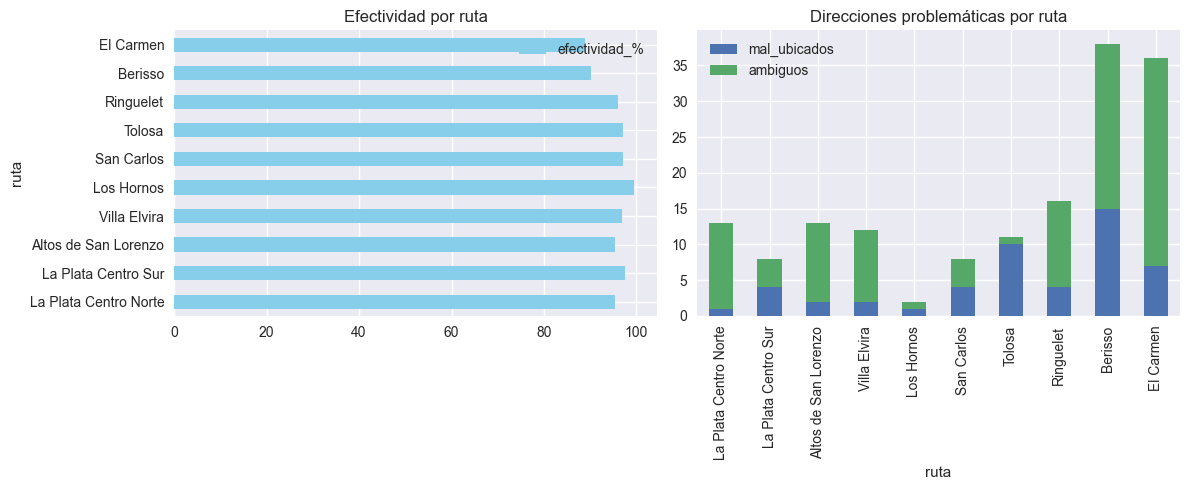

In [28]:
# ------------------------------------------------------------
# CELDA 7 — MAPAS Y GRÁFICOS DE ANÁLISIS
# ------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

rutas_df.plot(
    x="ruta",
    y="efectividad_%",
    kind="barh",
    color="skyblue",
    ax=ax[0],
    title="Efectividad por ruta"
)

rutas_df.plot(
    x="ruta",
    y=["mal_ubicados", "ambiguos"],
    kind="bar",
    stacked=True,
    ax=ax[1],
    title="Direcciones problemáticas por ruta"
)

plt.tight_layout()
plt.show()


In [29]:
# ------------------------------------------------------------
# CELDA 8 — MARCAR DIRECCIONES SOSPECHOSAS / MAL UBICADAS
# ------------------------------------------------------------
# Unir la información de calles con barrios y con ambigüedades
streets_flagged = streets_with_barrio.merge(
    ambiguous_streets, on="name_norm", how="left"
)

streets_flagged["requiere_revision"] = streets_flagged["n_barrios"].apply(
    lambda x: True if x and x > 1 else False
)

print("📍 Calles marcadas para revisión:", streets_flagged["requiere_revision"].sum())
display(streets_flagged[streets_flagged["requiere_revision"]][["name", "barrio"]].head(10))


📍 Calles marcadas para revisión: 4999


,name,barrio
12,Avenida 44,San Carlos
13,Calle 120,NaN
14,Avenida 66,La Plata Centro
15,Calle 120,Tolosa
16,Avenida 31,NaN
17,Boulevard 84,La Plata Centro
19,Camino General Belgrano,Ringuelet
20,Calle 120,La Plata Centro
21,Calle 3,NaN
24,Avenida 38,San Carlos


In [30]:
# ------------------------------------------------------------
# CELDA 9 — EXPORTAR RESULTADOS
# ------------------------------------------------------------
streets_flagged.to_file("calles_con_revision.geojson", driver="GeoJSON")
rutas_df.to_csv("estadisticas_rutas.csv", index=False)

print("✅ Archivos exportados:")
print(" - calles_con_revision.geojson")
print(" - estadisticas_rutas.csv")


✅ Archivos exportados:
 - calles_con_revision.geojson
 - estadisticas_rutas.csv


In [1]:
import sys
print(sys.executable)


C:\Python313\python.exe


In [2]:
!pip freeze


anyio==4.11.0
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.5
attrs==25.4.0
babel==2.17.0
beautifulsoup4==4.14.2
bleach==6.2.0
branca==0.8.2
certifi==2025.10.5
cffi==2.0.0
charset-normalizer==3.4.4
click==8.3.0
click-plugins==1.1.1.2
cligj==0.7.2
colorama==0.4.6
comm==0.2.3
contourpy==1.3.3
cycler==0.12.1
debugpy==1.8.17
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.1
fastjsonschema==2.21.2
fiona==1.10.1
folium==0.20.0
fonttools==4.60.1
fqdn==1.5.1
geopandas==1.1.1
h11==0.16.0
httpcore==1.0.9
httpx==0.28.1
idna==3.11
ipykernel==7.0.1
ipython==9.6.0
ipython_pygments_lexers==1.1.1
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.6
json5==0.12.1
jsonpointer==3.0.0
jsonschema==4.25.1
jsonschema-specifications==2025.9.1
jupyter-events==0.12.0
jupyter-lsp==2.3.0
jupyter_client==8.6.3
jupyter_core==5.9.1
jupyter_server==2.17.0
jupyter_server_terminals==0.5.3
jupyterlab==4.4.9
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
kiwisolver==1.4.

In [1]:
import sys
print(sys.executable)


C:\Users\tomyg\OneDrive\Desktop\logistica-analisis\venv\Scripts\python.exe
